In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [323]:
df = pd.read_csv("final_quality_air.csv")

## Exploratory Data Analysis

In [324]:
df.head()

periode_data   tanggal             stasiun pm10 so2  co  o3 no2 max  \
0        201401  1/1/2014  DKI1 (Bunderan HI)   77   3  39  54  13  77   
1        201401  1/2/2014  DKI1 (Bunderan HI)   55   4  29  58  12  58   
2        201401  1/3/2014  DKI1 (Bunderan HI)   60   5  40  68  13  68   
3        201401  1/4/2014  DKI1 (Bunderan HI)   55   7  30  56  14  56   
4        201401  1/5/2014  DKI1 (Bunderan HI)   39   4  18  48  10  48   

  critical categori  Unnamed: 11  
0     PM10   SEDANG          NaN  
1       O3   SEDANG          NaN  
2       O3   SEDANG          NaN  
3       O3   SEDANG          NaN  
4       O3     BAIK          NaN

In [325]:
df.columns

Index(['periode_data', 'tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2',
       'max', 'critical', 'categori', 'Unnamed: 11'],
      dtype='object')

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14530 entries, 0 to 14529
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   periode_data  14530 non-null  int64  
 1   tanggal       14530 non-null  object 
 2   stasiun       14530 non-null  object 
 3   pm10          14485 non-null  object 
 4   so2           14476 non-null  object 
 5   co            14477 non-null  object 
 6   o3            14451 non-null  object 
 7   no2           14454 non-null  object 
 8   max           14503 non-null  object 
 9   critical      14328 non-null  object 
 10  categori      14530 non-null  object 
 11  Unnamed: 11   0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.3+ MB


In [327]:
df.isnull().sum()

periode_data        0
tanggal             0
stasiun             0
pm10               45
so2                54
co                 53
o3                 79
no2                76
max                27
critical          202
categori            0
Unnamed: 11     14530
dtype: int64

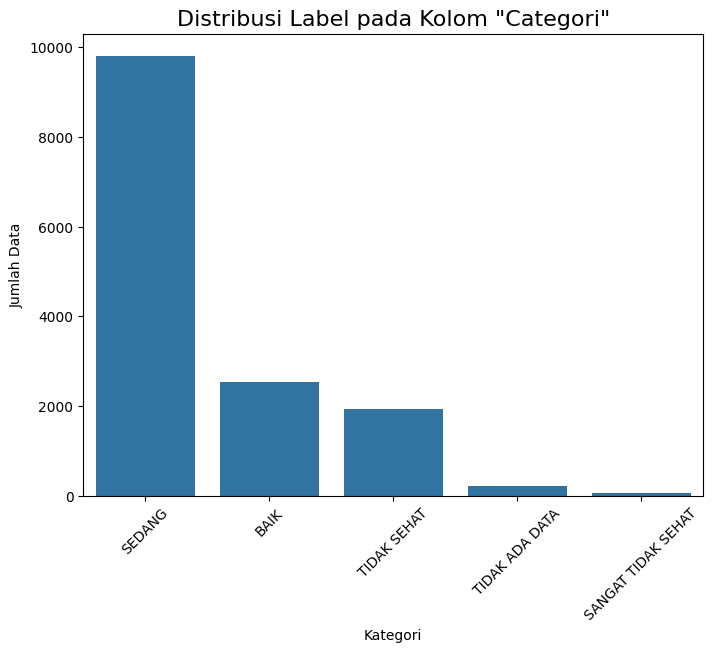

In [328]:
categori_distribution = df['categori'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=categori_distribution.index, y=categori_distribution.values)
plt.title('Distribusi Label pada Kolom "Categori"', fontsize=16)
plt.ylabel('Jumlah Data')
plt.xlabel('Kategori')
plt.xticks(rotation=45)
plt.show()

C:\Users\Ferdinand lowata\AppData\Local\Temp\ipykernel_9476\2113976490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["stasiun"], order=df["stasiun"].value_counts().index, palette="viridis")


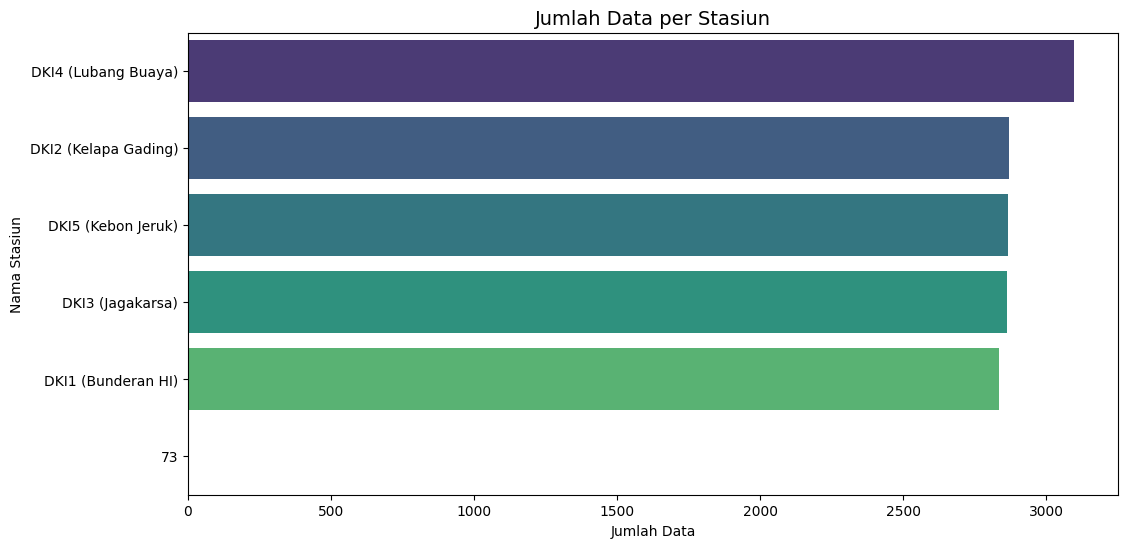

In [329]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["stasiun"], order=df["stasiun"].value_counts().index, palette="viridis")
plt.title("Jumlah Data per Stasiun", fontsize=14)
plt.xlabel("Jumlah Data")
plt.ylabel("Nama Stasiun")
plt.show()

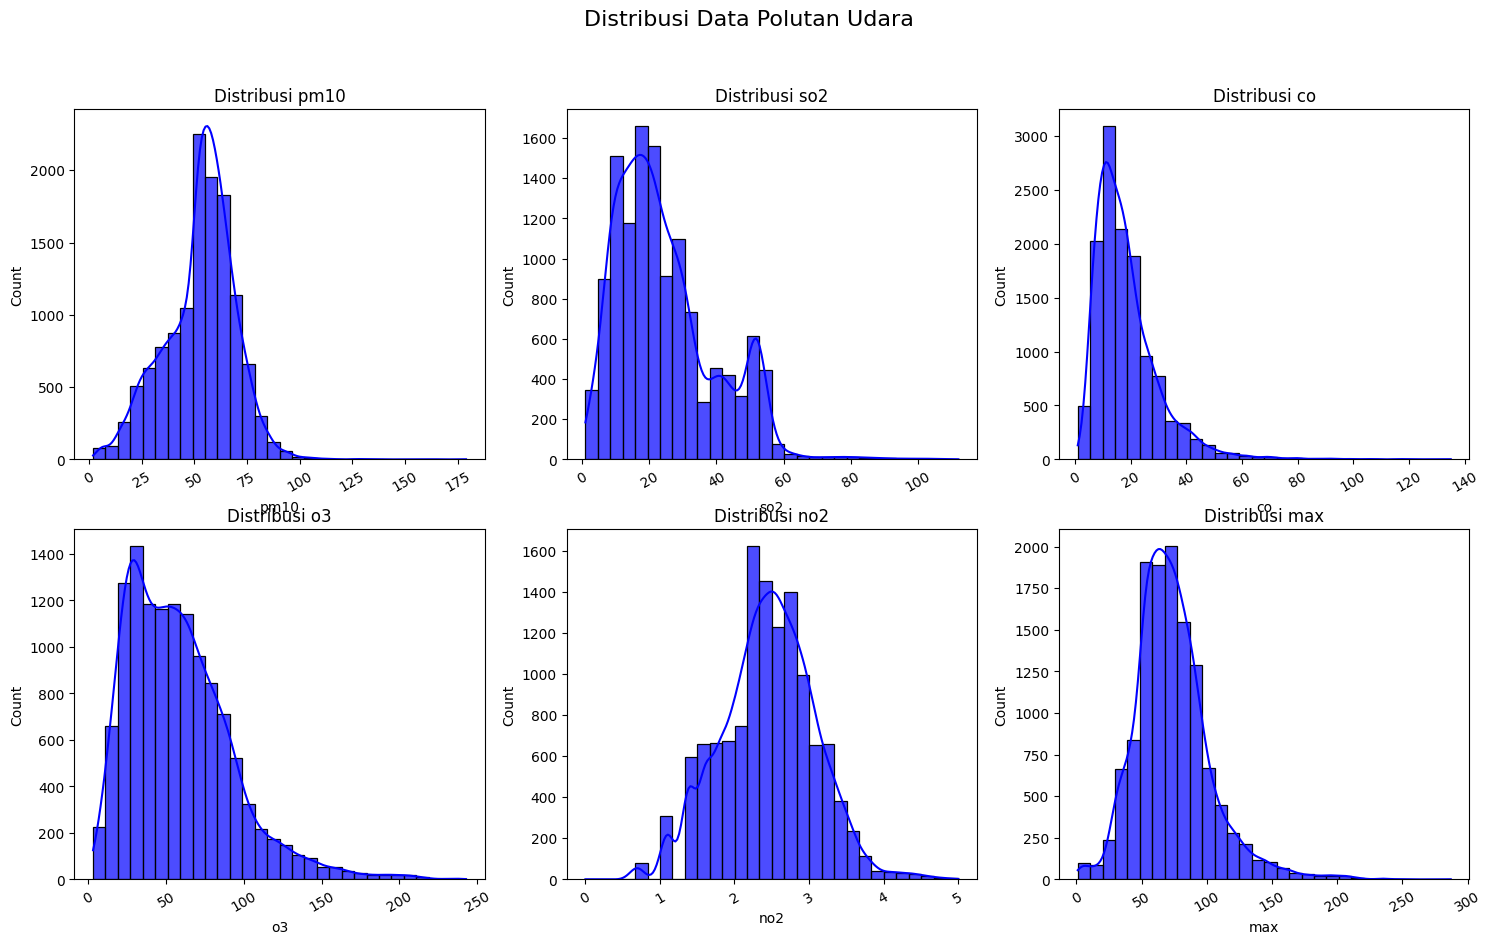

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = ["pm10", "so2", "co", "o3", "no2", "max"]

df_clean = df[features].apply(pd.to_numeric, errors='coerce').dropna()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribusi Data Polutan Udara", fontsize=16)

for i, col in enumerate(features):
    row, col_idx = divmod(i, 3)
    data = df_clean[col]

    if data.max() > 10 * data.median():
        data = np.log1p(data)

    sns.histplot(data, bins=30, kde=True, ax=axes[row, col_idx], color="blue", alpha=0.7)
    axes[row, col_idx].set_title(f"Distribusi {col}")

    axes[row, col_idx].tick_params(axis='x', rotation=30)

plt.show()


C:\Users\Ferdinand lowata\AppData\Local\Temp\ipykernel_9476\484525208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["critical"], palette="coolwarm")


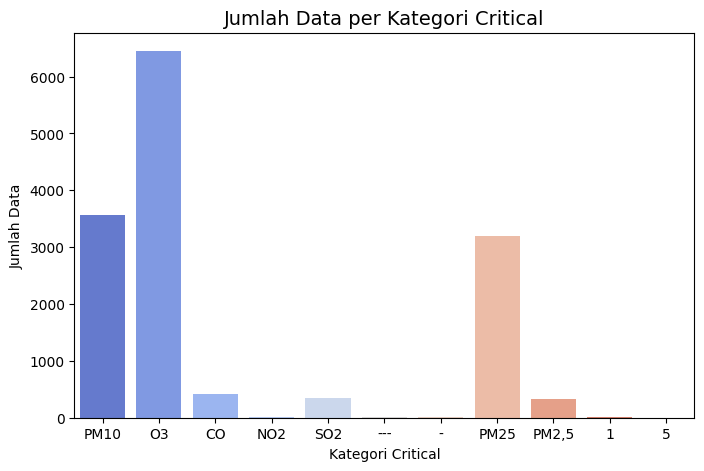

In [331]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["critical"], palette="coolwarm")
plt.title("Jumlah Data per Kategori Critical", fontsize=14)
plt.xlabel("Kategori Critical")
plt.ylabel("Jumlah Data")
plt.show()

## DATA PREPROCESSING

In [332]:
df.head()

periode_data   tanggal             stasiun pm10 so2  co  o3 no2 max  \
0        201401  1/1/2014  DKI1 (Bunderan HI)   77   3  39  54  13  77   
1        201401  1/2/2014  DKI1 (Bunderan HI)   55   4  29  58  12  58   
2        201401  1/3/2014  DKI1 (Bunderan HI)   60   5  40  68  13  68   
3        201401  1/4/2014  DKI1 (Bunderan HI)   55   7  30  56  14  56   
4        201401  1/5/2014  DKI1 (Bunderan HI)   39   4  18  48  10  48   

  critical categori  Unnamed: 11  
0     PM10   SEDANG          NaN  
1       O3   SEDANG          NaN  
2       O3   SEDANG          NaN  
3       O3   SEDANG          NaN  
4       O3     BAIK          NaN

In [333]:
df.columns

Index(['periode_data', 'tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2',
       'max', 'critical', 'categori', 'Unnamed: 11'],
      dtype='object')

In [334]:
df.drop(['Unnamed: 11'], axis = 1, inplace=True)


In [335]:
df.head()

periode_data   tanggal             stasiun pm10 so2  co  o3 no2 max  \
0        201401  1/1/2014  DKI1 (Bunderan HI)   77   3  39  54  13  77   
1        201401  1/2/2014  DKI1 (Bunderan HI)   55   4  29  58  12  58   
2        201401  1/3/2014  DKI1 (Bunderan HI)   60   5  40  68  13  68   
3        201401  1/4/2014  DKI1 (Bunderan HI)   55   7  30  56  14  56   
4        201401  1/5/2014  DKI1 (Bunderan HI)   39   4  18  48  10  48   

  critical categori  
0     PM10   SEDANG  
1       O3   SEDANG  
2       O3   SEDANG  
3       O3   SEDANG  
4       O3     BAIK

In [336]:
df.isnull().sum()

periode_data      0
tanggal           0
stasiun           0
pm10             45
so2              54
co               53
o3               79
no2              76
max              27
critical        202
categori          0
dtype: int64

In [337]:
df = df[df['categori'] != 'TIDAK ADA DATA']
df = df[df['categori'] != 'categori']

In [338]:
cols_to_convert = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [339]:
df.fillna(df.mean(numeric_only=True), inplace=True)

categorical_cols = ['critical', 'categori']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Ferdinand lowata\AppData\Local\Temp\ipykernel_9476\954658871.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [340]:
df.isnull().sum()

periode_data    0
tanggal         0
stasiun         0
pm10            0
so2             0
co              0
o3              0
no2             0
max             0
critical        0
categori        0
dtype: int64

In [341]:
df.head()

periode_data   tanggal             stasiun  pm10  so2    co    o3   no2  \
0        201401  1/1/2014  DKI1 (Bunderan HI)  77.0  3.0  39.0  54.0  13.0   
1        201401  1/2/2014  DKI1 (Bunderan HI)  55.0  4.0  29.0  58.0  12.0   
2        201401  1/3/2014  DKI1 (Bunderan HI)  60.0  5.0  40.0  68.0  13.0   
3        201401  1/4/2014  DKI1 (Bunderan HI)  55.0  7.0  30.0  56.0  14.0   
4        201401  1/5/2014  DKI1 (Bunderan HI)  39.0  4.0  18.0  48.0  10.0   

    max critical categori  
0  77.0     PM10   SEDANG  
1  58.0       O3   SEDANG  
2  68.0       O3   SEDANG  
3  56.0       O3   SEDANG  
4  48.0       O3     BAIK

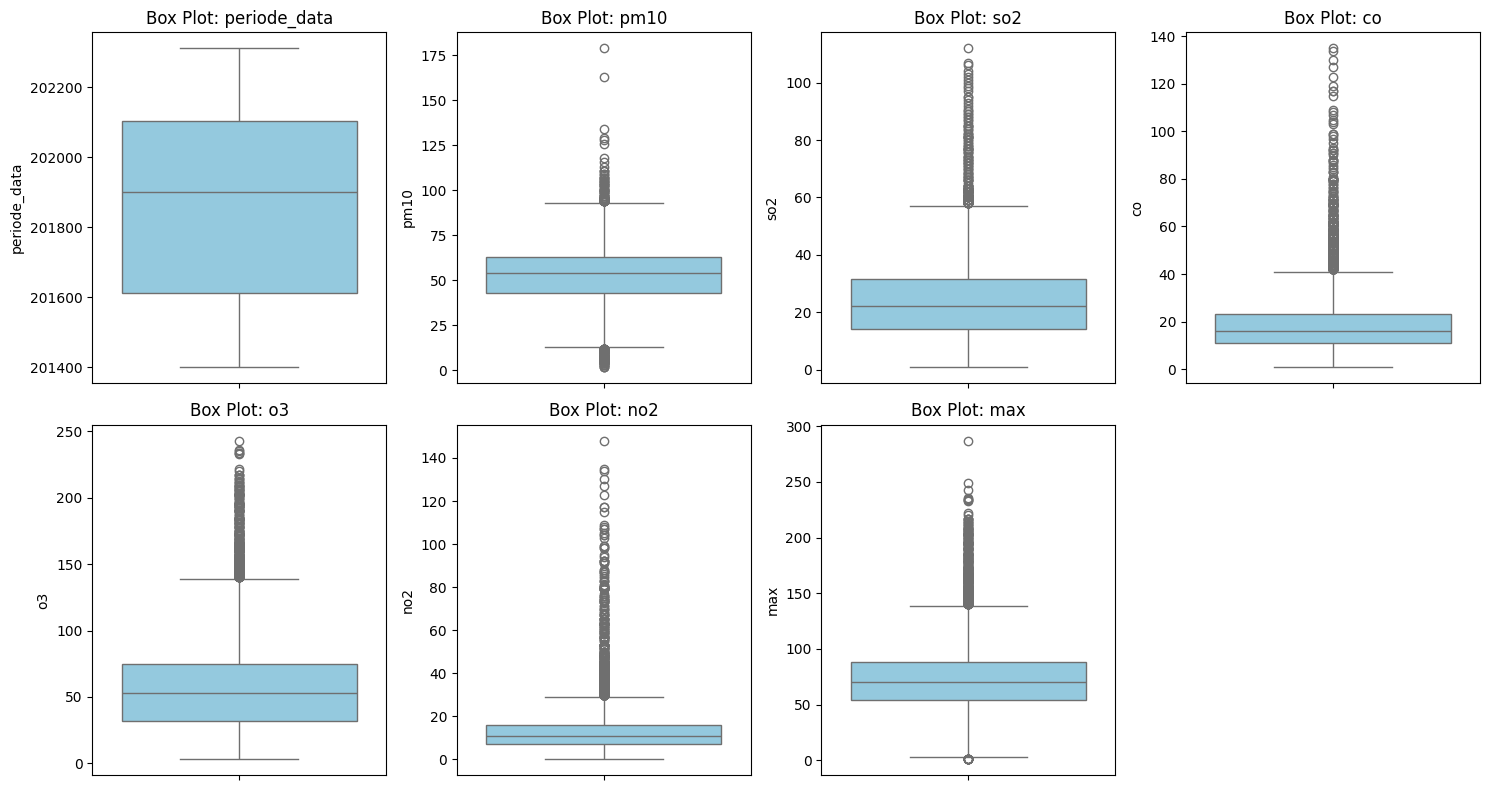

In [342]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, (len(numerical_features) // 2) + 1, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Box Plot: {col}")

plt.tight_layout()
plt.show()

In [343]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

In [344]:
iqr_outliers = detect_outliers_iqr(df, cols_to_convert)

In [345]:
for col in cols_to_convert:
    print("Kolom {} - IQR Outliers: {}".format(col, len(iqr_outliers[col])))

Kolom pm10 - IQR Outliers: 236
Kolom so2 - IQR Outliers: 167
Kolom co - IQR Outliers: 622
Kolom o3 - IQR Outliers: 366
Kolom no2 - IQR Outliers: 738
Kolom max - IQR Outliers: 423


In [346]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

data_no_outliers = remove_outliers_iqr(df, cols_to_convert)

In [347]:
iqr_outliers = detect_outliers_iqr(data_no_outliers, cols_to_convert)

In [348]:
for col in cols_to_convert:
    print("Kolom {} - IQR Outliers: {}".format(col, len(iqr_outliers[col])))

Kolom pm10 - IQR Outliers: 0
Kolom so2 - IQR Outliers: 0
Kolom co - IQR Outliers: 0
Kolom o3 - IQR Outliers: 0
Kolom no2 - IQR Outliers: 0
Kolom max - IQR Outliers: 0


In [349]:
df_cleaned = remove_outliers_iqr(df.copy(), cols_to_convert)

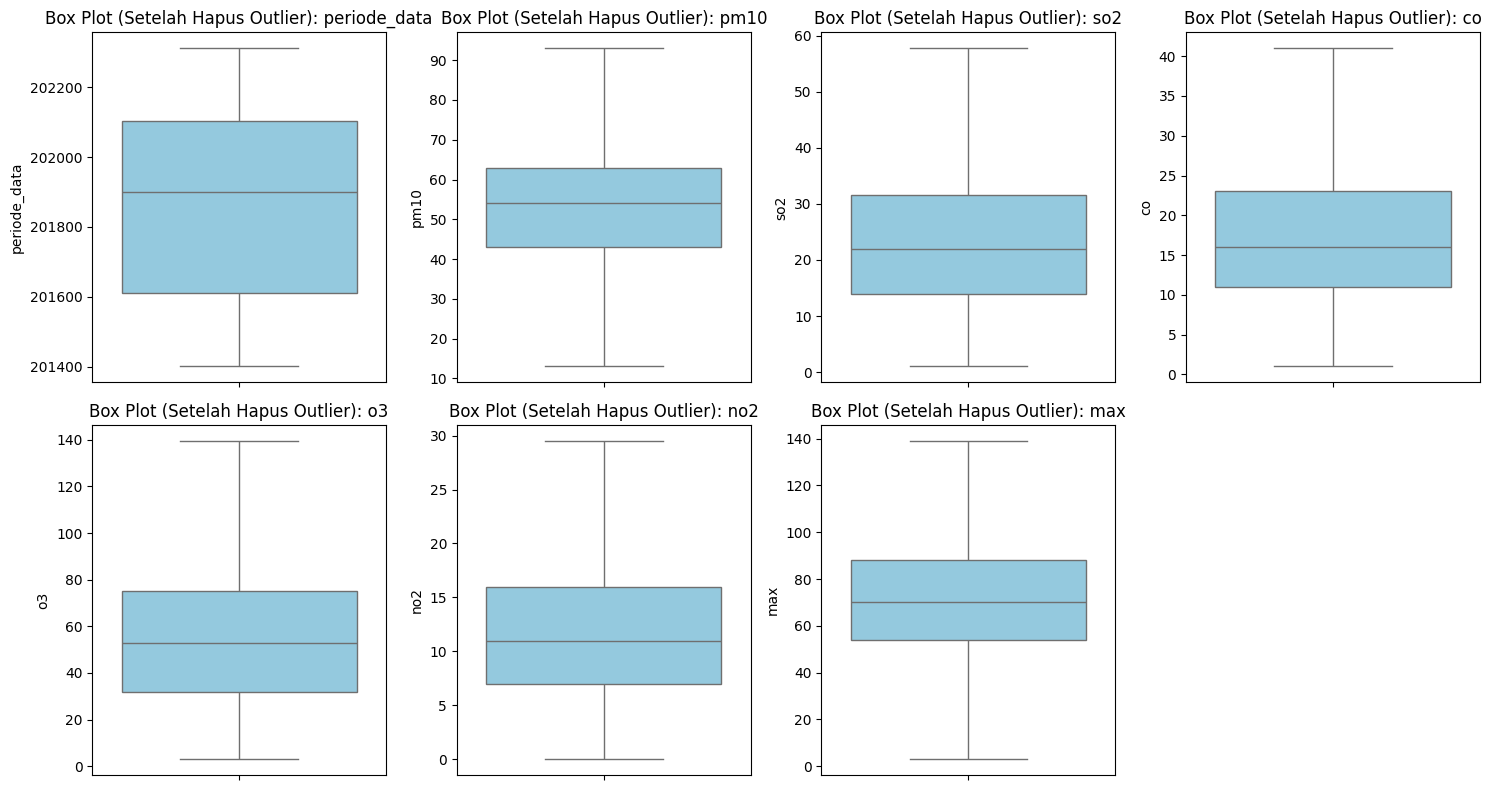

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, (len(numerical_features) // 2) + 1, i)
    sns.boxplot(y=df_cleaned[col], color='skyblue')
    plt.title(f"Box Plot (Setelah Hapus Outlier): {col}")

plt.tight_layout()
plt.show()

In [351]:
df_normalized = df_cleaned.copy()
scaler = MinMaxScaler()

df_normalized[cols_to_convert] = scaler.fit_transform(df_cleaned[cols_to_convert])

df_normalized = df_normalized[df_normalized['categori'] != 'SANGAT TIDAK SEHAT']
df_normalized = df_normalized[df_normalized['categori'] != 'TIDAK ADA DATA']

In [352]:
df_normalized.head()

periode_data   tanggal             stasiun    pm10       so2     co  \
0        201401  1/1/2014  DKI1 (Bunderan HI)  0.8000  0.035242  0.950   
1        201401  1/2/2014  DKI1 (Bunderan HI)  0.5250  0.052863  0.700   
2        201401  1/3/2014  DKI1 (Bunderan HI)  0.5875  0.070485  0.975   
3        201401  1/4/2014  DKI1 (Bunderan HI)  0.5250  0.105727  0.725   
4        201401  1/5/2014  DKI1 (Bunderan HI)  0.3250  0.052863  0.425   

         o3       no2       max critical categori  
0  0.373626  0.440678  0.544118     PM10   SEDANG  
1  0.402930  0.406780  0.404412       O3   SEDANG  
2  0.476190  0.440678  0.477941       O3   SEDANG  
3  0.388278  0.474576  0.389706       O3   SEDANG  
4  0.329670  0.338983  0.330882       O3     BAIK

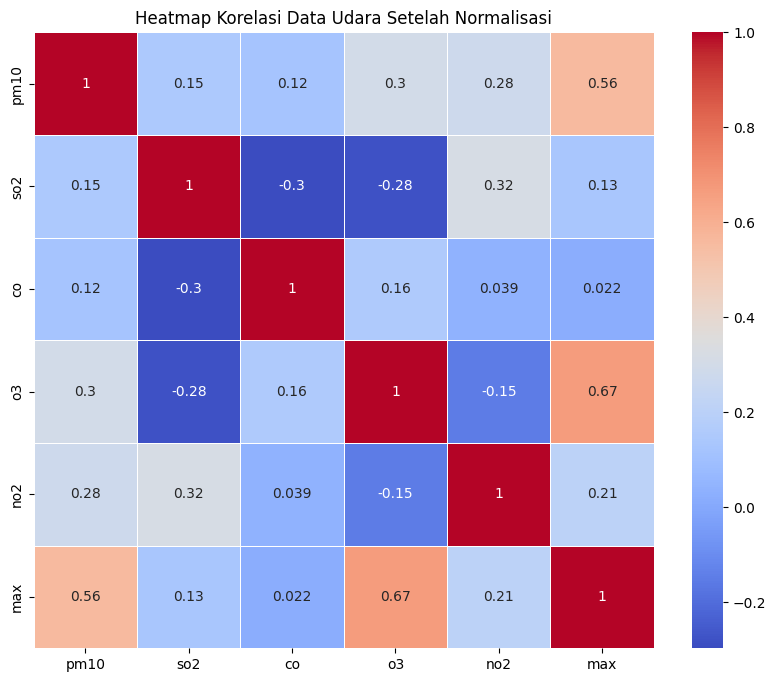

In [353]:
numeric_cols = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']
df_numeric = df_normalized[numeric_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Data Udara Setelah Normalisasi")
plt.show()

## Feature Engineering

### - Encoding

In [354]:
def udara(kualitas):
  if kualitas == "BAIK":
    return 3
  elif kualitas == "SEDANG":
    return 2
  elif kualitas== "TIDAK SEHAT":
    return 1
  else:
    return 0
df["kualitas_udara"] = df['categori'].apply(udara)

df.head()

periode_data   tanggal             stasiun  pm10  so2    co    o3   no2  \
0        201401  1/1/2014  DKI1 (Bunderan HI)  77.0  3.0  39.0  54.0  13.0   
1        201401  1/2/2014  DKI1 (Bunderan HI)  55.0  4.0  29.0  58.0  12.0   
2        201401  1/3/2014  DKI1 (Bunderan HI)  60.0  5.0  40.0  68.0  13.0   
3        201401  1/4/2014  DKI1 (Bunderan HI)  55.0  7.0  30.0  56.0  14.0   
4        201401  1/5/2014  DKI1 (Bunderan HI)  39.0  4.0  18.0  48.0  10.0   

    max critical categori  kualitas_udara  
0  77.0     PM10   SEDANG               2  
1  58.0       O3   SEDANG               2  
2  68.0       O3   SEDANG               2  
3  56.0       O3   SEDANG               2  
4  48.0       O3     BAIK               3

In [355]:
scaler = MinMaxScaler()  
features_to_scale = ["pm10", "so2", "co", "o3", "no2", "max"]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

periode_data   tanggal             stasiun    pm10       so2     co  \
0        201401  1/1/2014  DKI1 (Bunderan HI)  0.8000  0.035242  0.950   
1        201401  1/2/2014  DKI1 (Bunderan HI)  0.5250  0.052863  0.700   
2        201401  1/3/2014  DKI1 (Bunderan HI)  0.5875  0.070485  0.975   
3        201401  1/4/2014  DKI1 (Bunderan HI)  0.5250  0.105727  0.725   
4        201401  1/5/2014  DKI1 (Bunderan HI)  0.3250  0.052863  0.425   

         o3       no2       max critical categori  kualitas_udara  
0  0.373626  0.440678  0.544118     PM10   SEDANG               2  
1  0.402930  0.406780  0.404412       O3   SEDANG               2  
2  0.476190  0.440678  0.477941       O3   SEDANG               2  
3  0.388278  0.474576  0.389706       O3   SEDANG               2  
4  0.329670  0.338983  0.330882       O3     BAIK               3

In [356]:
bins = [0, 50, 100, 250, np.inf]
labels = ["Rendah", "Sedang", "Tinggi", "Berbahaya"]
df["pm10_level"] = pd.cut(df["pm10"] * 100, bins=bins, labels=labels)  # Dikembalikan ke skala asli sebelum bining
df.head()

periode_data   tanggal             stasiun    pm10       so2     co  \
0        201401  1/1/2014  DKI1 (Bunderan HI)  0.8000  0.035242  0.950   
1        201401  1/2/2014  DKI1 (Bunderan HI)  0.5250  0.052863  0.700   
2        201401  1/3/2014  DKI1 (Bunderan HI)  0.5875  0.070485  0.975   
3        201401  1/4/2014  DKI1 (Bunderan HI)  0.5250  0.105727  0.725   
4        201401  1/5/2014  DKI1 (Bunderan HI)  0.3250  0.052863  0.425   

         o3       no2       max critical categori  kualitas_udara pm10_level  
0  0.373626  0.440678  0.544118     PM10   SEDANG               2     Sedang  
1  0.402930  0.406780  0.404412       O3   SEDANG               2     Sedang  
2  0.476190  0.440678  0.477941       O3   SEDANG               2     Sedang  
3  0.388278  0.474576  0.389706       O3   SEDANG               2     Sedang  
4  0.329670  0.338983  0.330882       O3     BAIK               3     Rendah

In [357]:
df["pm10_so2_ratio"] = df["pm10"] / (df["so2"] + 1e-5) 
df["co_o3_interaction"] = df["co"] * df["o3"]
df.head()

periode_data   tanggal             stasiun    pm10       so2     co  \
0        201401  1/1/2014  DKI1 (Bunderan HI)  0.8000  0.035242  0.950   
1        201401  1/2/2014  DKI1 (Bunderan HI)  0.5250  0.052863  0.700   
2        201401  1/3/2014  DKI1 (Bunderan HI)  0.5875  0.070485  0.975   
3        201401  1/4/2014  DKI1 (Bunderan HI)  0.5250  0.105727  0.725   
4        201401  1/5/2014  DKI1 (Bunderan HI)  0.3250  0.052863  0.425   

         o3       no2       max critical categori  kualitas_udara pm10_level  \
0  0.373626  0.440678  0.544118     PM10   SEDANG               2     Sedang   
1  0.402930  0.406780  0.404412       O3   SEDANG               2     Sedang   
2  0.476190  0.440678  0.477941       O3   SEDANG               2     Sedang   
3  0.388278  0.474576  0.389706       O3   SEDANG               2     Sedang   
4  0.329670  0.338983  0.330882       O3     BAIK               3     Rendah   

   pm10_so2_ratio  co_o3_interaction  
0       22.693561           0.354945  
1        9.929372           0.282051  
2        8.333974           0.464286  
3        4.965155           0.281502  
4        6.146754           0.140110

Tujuan dari kode ini adalah melakukan feature engineering dengan feature interaction, yaitu menciptakan fitur baru berdasarkan hubungan antar fitur yang sudah ada.

Penjelasan:

pm10_so2_ratio → Menghitung rasio antara PM10 dan SO2

Tujuannya adalah untuk melihat seberapa besar partikel PM10 dibandingkan dengan kadar SO2, yang bisa menunjukkan sumber atau tingkat pencemaran tertentu.
+ 1e-5 digunakan untuk menghindari pembagian dengan nol.
co_o3_interaction → Menghitung interaksi antara CO dan O3

Tujuannya adalah melihat hubungan antara karbon monoksida (CO) dan ozon (O3), karena kedua gas ini bisa berinteraksi dalam reaksi kimia di atmosfer yang memengaruhi kualitas udara.

# Feature Selection

In [358]:
from scipy.stats import f_oneway

for col in numeric_cols:
    anova_result = f_oneway(
        *[df_normalized[df_normalized['categori'] == cat][col] for cat in df_normalized['categori'].unique()]
    )
    print(f"ANOVA {col} terhadap kategori udara: p-value = {anova_result.pvalue:.4f}")

ANOVA pm10 terhadap kategori udara: p-value = 0.0000
ANOVA so2 terhadap kategori udara: p-value = 0.0000
ANOVA co terhadap kategori udara: p-value = 0.0000
ANOVA o3 terhadap kategori udara: p-value = 0.0000
ANOVA no2 terhadap kategori udara: p-value = 0.0000
ANOVA max terhadap kategori udara: p-value = 0.0000


In [359]:
df.columns = df.columns.str.strip().str.lower()  
print(df.columns) 


Index(['periode_data', 'tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2',
       'max', 'critical', 'categori', 'kualitas_udara', 'pm10_level',
       'pm10_so2_ratio', 'co_o3_interaction'],
      dtype='object')


In [360]:
selected_features = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']

df_select = df[selected_features]
df_select

pm10       so2     co        o3       no2       max
0      0.8000  0.035242  0.950  0.373626  0.440678  0.544118
1      0.5250  0.052863  0.700  0.402930  0.406780  0.404412
2      0.5875  0.070485  0.975  0.476190  0.440678  0.477941
3      0.5250  0.105727  0.725  0.388278  0.474576  0.389706
4      0.3250  0.052863  0.425  0.329670  0.338983  0.330882
...       ...       ...    ...       ...       ...       ...
14525  0.4375  0.563877  0.500  0.300366  0.677966  0.500000
14526  0.4750  0.546256  0.425  0.366300  0.644068  0.536765
14527  0.5375  0.563877  0.475  0.329670  0.711864  0.625000
14528  0.5375  0.546256  0.425  0.388278  0.610169  0.625000
14529  0.2125  0.546256  0.350  0.424908  0.576271  0.426471

[14315 rows x 6 columns]

## Modelling

RANDOMFOREST 

In [361]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']
df_numeric = df_normalized[numeric_cols]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_numeric)
joblib.dump(scaler, "scaler.pkl")

le = LabelEncoder()
y = le.fit_transform(df_normalized['categori'])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [362]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [363]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [364]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9982480728801681


In [365]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       533
           1       1.00      1.00      1.00      1949
           2       1.00      0.99      1.00       372

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



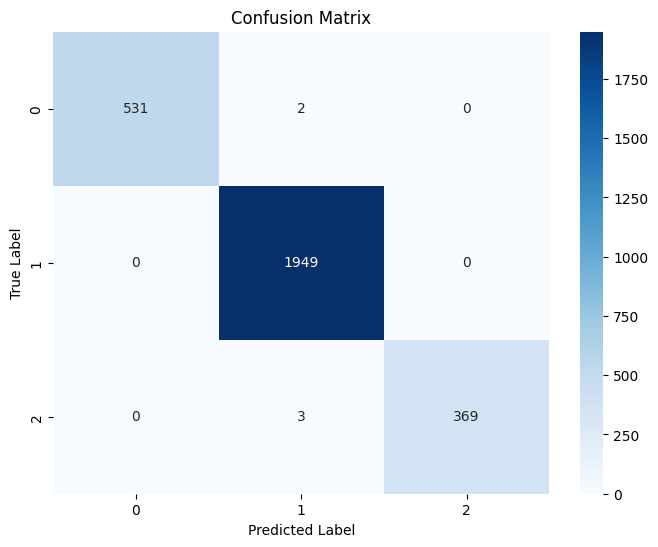

In [366]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [367]:
from sklearn.model_selection import cross_val_score


rf_scores = cross_val_score(model, X_train, y_train, cv=10)


print("Random Forest CV scores:", rf_scores)
print("Average CV accuracy (Random Forest):", np.mean(rf_scores))


Random Forest CV scores: [0.99737303 0.99912434 0.99824715 0.99737073 0.99824715 0.99824715
 0.99737073 0.99737073 0.99561788 0.9964943 ]
Average CV accuracy (Random Forest): 0.9975463192486389


In [368]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Setelah model.fit(...)
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']